In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                          Import the libraries needed to perform the task

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving master.csv to master.csv


 Uploading the file

In [ ]:
df=pd.read_csv(r'master.csv')
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


Load the dataset and viewing the first 10 rows

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


 It gives information about the dataframe i.e, how many rows and columns are there and their datatypes

In [ ]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicides_100k_pop', 'country_year', 'HDI_for_year','gdp_for_year','gdp_per_capita', 'generation']

 Specifying column names ex:- HDI for year changes to HDI_for_year

In [ ]:
df.isnull().sum()


country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides_100k_pop        0
country_year             0
HDI_for_year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

 Checking for null values in every column and their counts

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


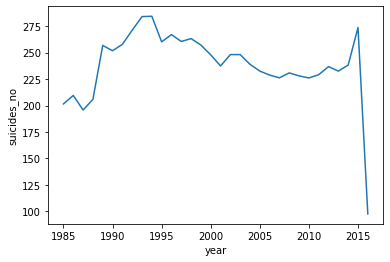

In [ ]:
sns.lineplot(df.year, df.suicides_no, ci = None)

Plotting the number of suicides in a particular year. 
The general trend shows that there was a huge increase in number of suicides around 1990 and it continued till 1995, then there was a slow decrasing till 2010 with a new increasing after it and peak in 2015. So,let's have a look how 
different causes affect suicide rates

**Gender and suicide rates** 

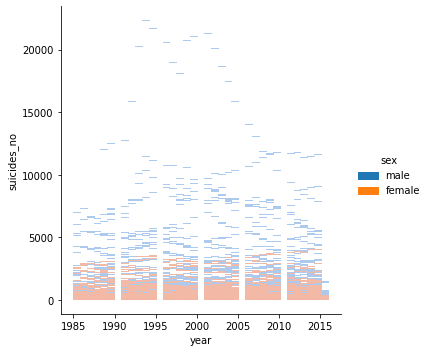

In [ ]:
sns.displot(df, x="year", y='suicides_no', hue="sex")

Plot suggests that male suicide more than feamale i.e, females suicides is between 0-5000 but the count of male suicides is spread upto 20000

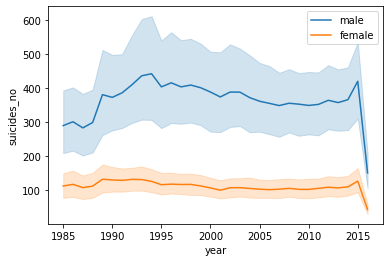

In [ ]:
df_men = df.query("sex=='male'")
df_women = df.query("sex=='female'")
sns.lineplot(data=df_men, x="year", y="suicides_no")
sns.lineplot(data=df_women, x="year", y="suicides_no")
plt.legend(["male", 'female'])

So, generally men tend to commit suicide more often than women. And there is a peak in 2015 for both of them. Also, there were less suicides before 1990 for men and the line is roughly straight for women.

**Age**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


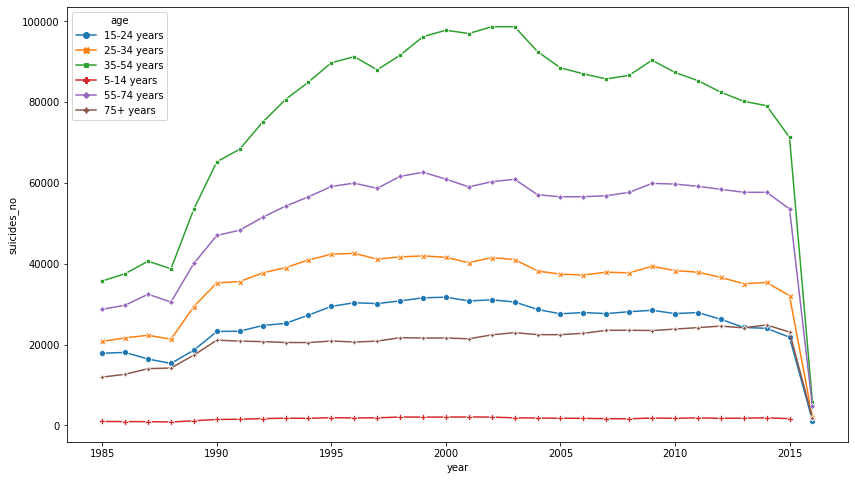

In [ ]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_age.reset_index(inplace=True)
plt.figure(figsize=(14,8))
sns.lineplot(data = df_age,x="year",y= df_age.suicides_no, hue = "age",
            style = "age", markers=True, dashes=False)

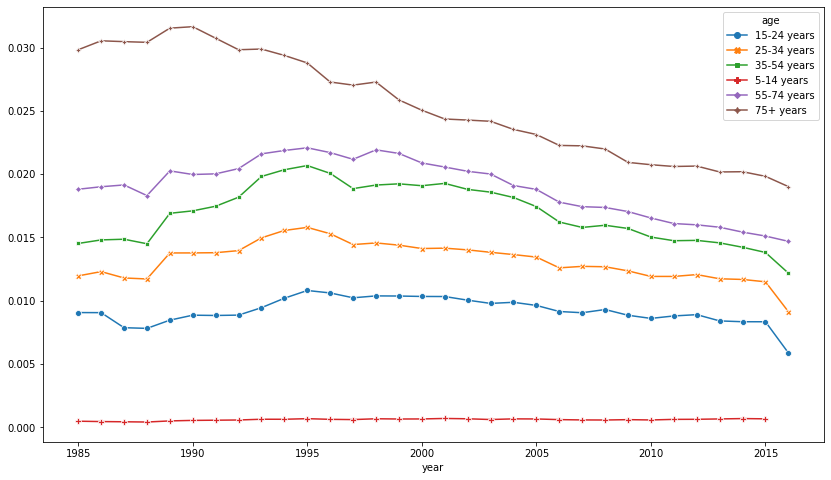

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(data = df_age,x="year",y= df_age.suicides_no*100/df_age.population, hue = "age",
            style = "age", markers=True, dashes=False)

5-14. Both graphs show that 5-14 years old kids almost do not kill themselves.

15-24. The first graph shows that absolute numbers are higher than for 75+ group, while the proportion shows this group is the next smallest suicide category after 5-14 group. Both graphs demonstrate tendency to decreasing of suicide numbers in this category.

25-34. A bit bigger numbers than for the previous category are shown on both graphs with general tendency todecreaing.

35-54. This looks very interesting as this category takes 20 years period, not 10 years as previous ones. And it is not surprising that absolute numbers are much bigger. What is surprising - the dramatic increasing of those numbers in 1990-2004 years period. The second graph shows increasing in 1988-1995 then it starts to decrease slowly. It also compensates huge absolute numbers - the propotion of suicides in this age group is not the highest one as absolute numbers on the first graph are.

55-74. Absolute numbers are a bit higher than in 25-34 category, while the proportion shows this is the second highest category after 75+ group

75+ The next high line on the first graph is 75+ category, there was an increasing of suicide number starting in 1988 and ending in 1990. After this year the number is around 20000 and doesn't tend to decrease. From the other hand, the population of this age group is increasing generally and the proportion of suicides is strongly decreasing because of that (since 1990). Nevertheless, in matter of proportions this age category proportion is still the highest one.

General tendency of suicide rates shows increasing around 1988 and decreasing after 1995 year.

Now let's have a look at age and gender distribution of suiciders using barplots.

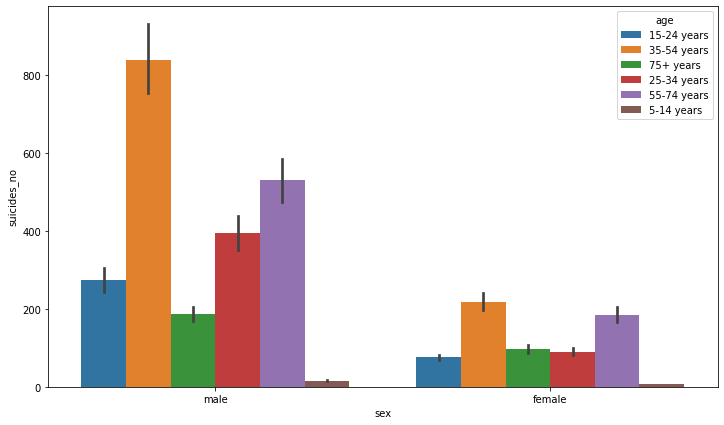

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


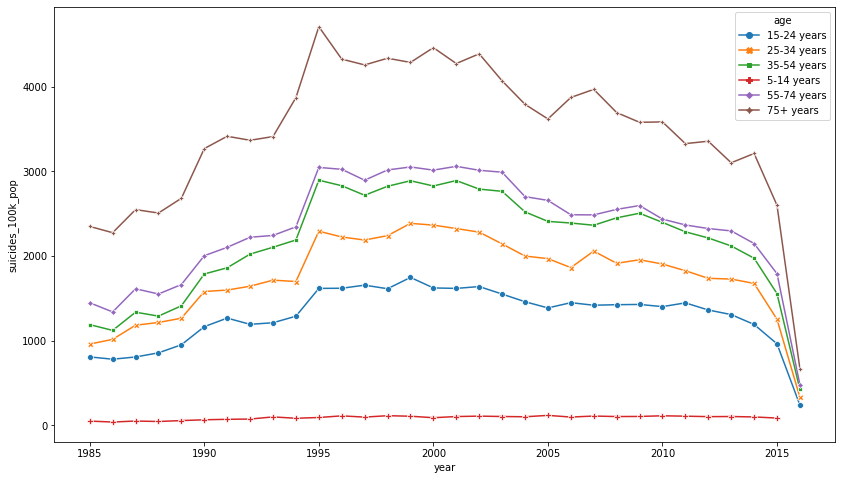

In [ ]:
df_age = df.groupby(["year","age"])["suicides_no",'suicides_100k_pop'].sum()
df_age.reset_index(inplace=True)
plt.figure(figsize=(14,8))
sns.lineplot(data = df_age,x="year",y= df_age.suicides_100k_pop, hue = "age",
            style = "age", markers=True, dashes=False)

The data has a column called 'suicides_100k_pop', the graph below shows the clear tendency of growth of suicide numbers per 100k population. We can conclude that age correlates with suicide - the older a person is - the higher chance to commit a suicide.

**Generations**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


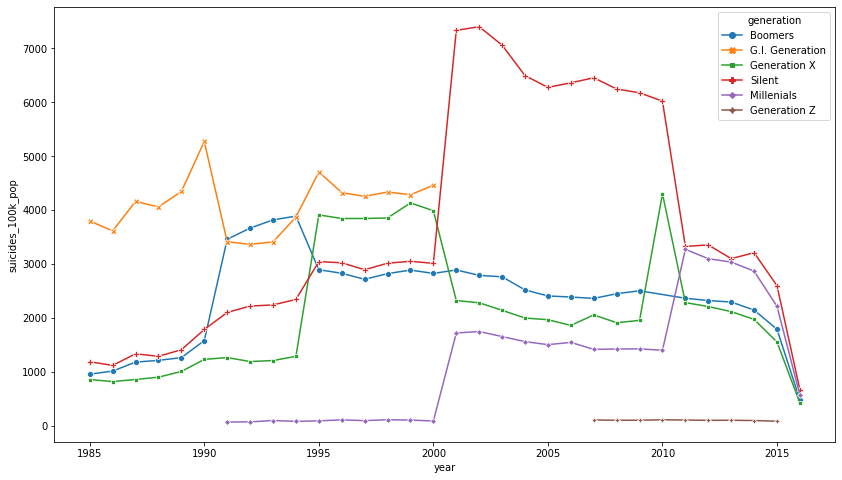

In [ ]:
df_gen = df.groupby(["year","generation"])["suicides_no", 'suicides_100k_pop'].sum()
df_gen.reset_index(inplace=True)
plt.figure(figsize=(14,8))
sns.lineplot(data = df_gen,x="year",y= df_gen.suicides_100k_pop, hue = "generation",
            style = "generation", markers=True, dashes=False)


Generation G.I. is a generation that in 1985 was in category 75+, so it's not surprising that the line ends at year 2000. There were not a lot of these old people and suicide rate was the highest, especially it increased in 1990.

Silent people were 35-54 years old in 1985. As their age between 1988 and 2000 was increasing, they tended to commit suicide more often, but in 2000 something happened, we can see a huge jump of numbers and a big decreasing of them in ~2011.

Boomers (25-34 years old in 1985) show a dramatic increasing between 1990 and 1995 with a slow decreasing after 1995.

Generation X (15-24 years old in 1985) were very young between 1985-1990, so the suicide rate is relatively low, but in 1995 we can see another jump. Looks like some historical disasters like wars or system changes coud influence during those years.

Millenials (15-24 in 2014) - while they were kids, the suicide rate was close to zero. When they were becoming teenagers and young adults, the rate was increasing. It could be because of bad surroundings, the Internet communities or wars in some sountries (we will have a look at countries later). Another reason - as they became adults and left their parents, the rapid change could lead to killing themselves.

Generation Z (5-14 in 2014) are still kids in 2015, nevertheless they do commit some suicides, the line is roughly straight, the rate is a bit higher than 0.

**Countries General list**

In [ ]:

country_list = list(df['country'].unique())
country_suicide_ratio = []
for i in country_list:
    x = df[df["country"] == i]
    country_suicide_rate = sum(x.suicides_100k_pop)/len(x)
    country_suicide_ratio.append(country_suicide_rate)
country_suicide_ratio

suicides = pd.DataFrame({"country": country_list, "country_suicide_ratio": country_suicide_ratio})
suicides=suicides.sort_values(by="country_suicide_ratio", ascending=False)

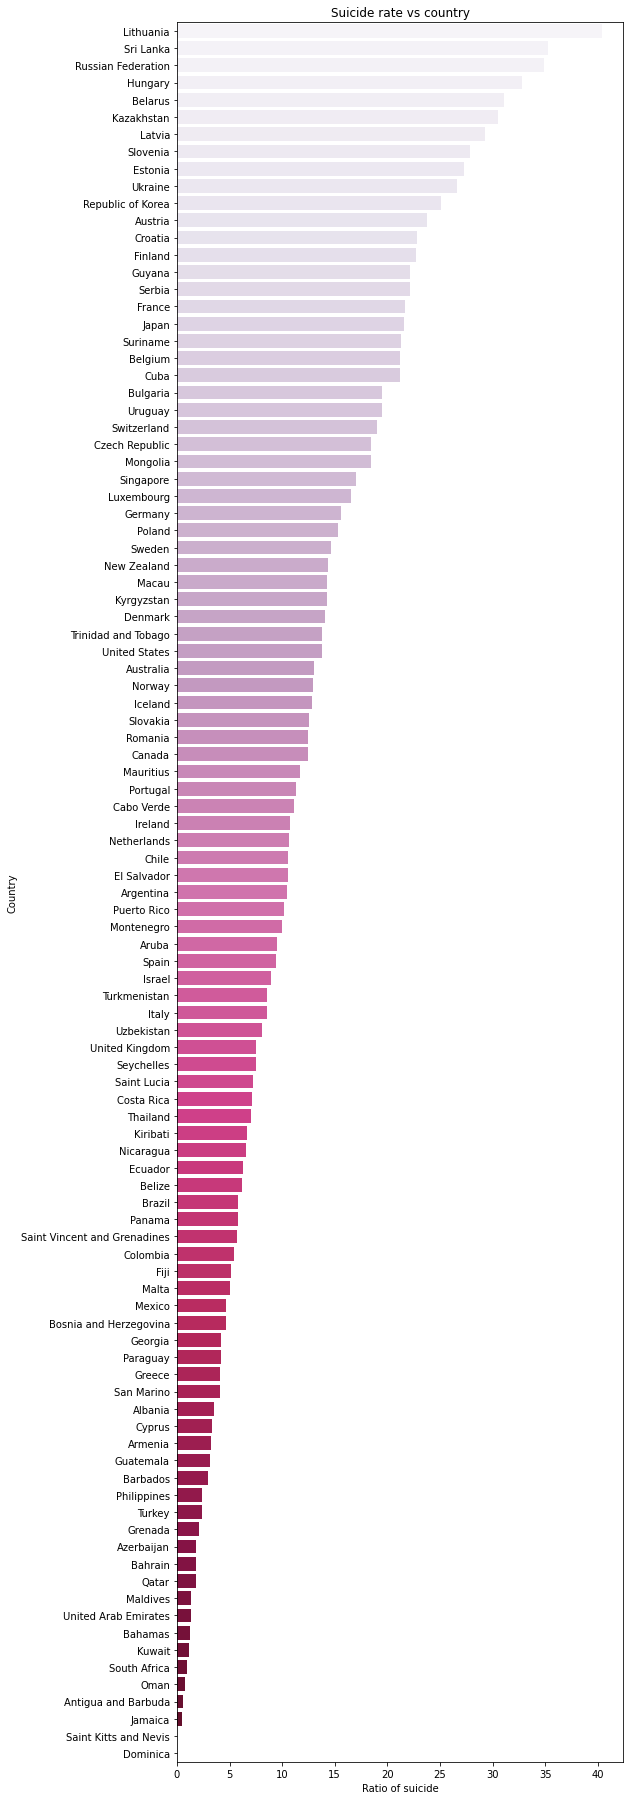

In [ ]:
plt.figure(figsize=(8,32))
sns.barplot(x=suicides['country_suicide_ratio'], y=suicides['country'], palette="PuRd")
plt.xlabel("Ratio of suicide")
plt.ylabel("Country")
plt.title("Suicide rate vs country")
plt.show()

In [ ]:
pip install ppscore

     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=af6c567234c7a2918eed2d780893ae9730415a732c63c1f79addb149538f80bb
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

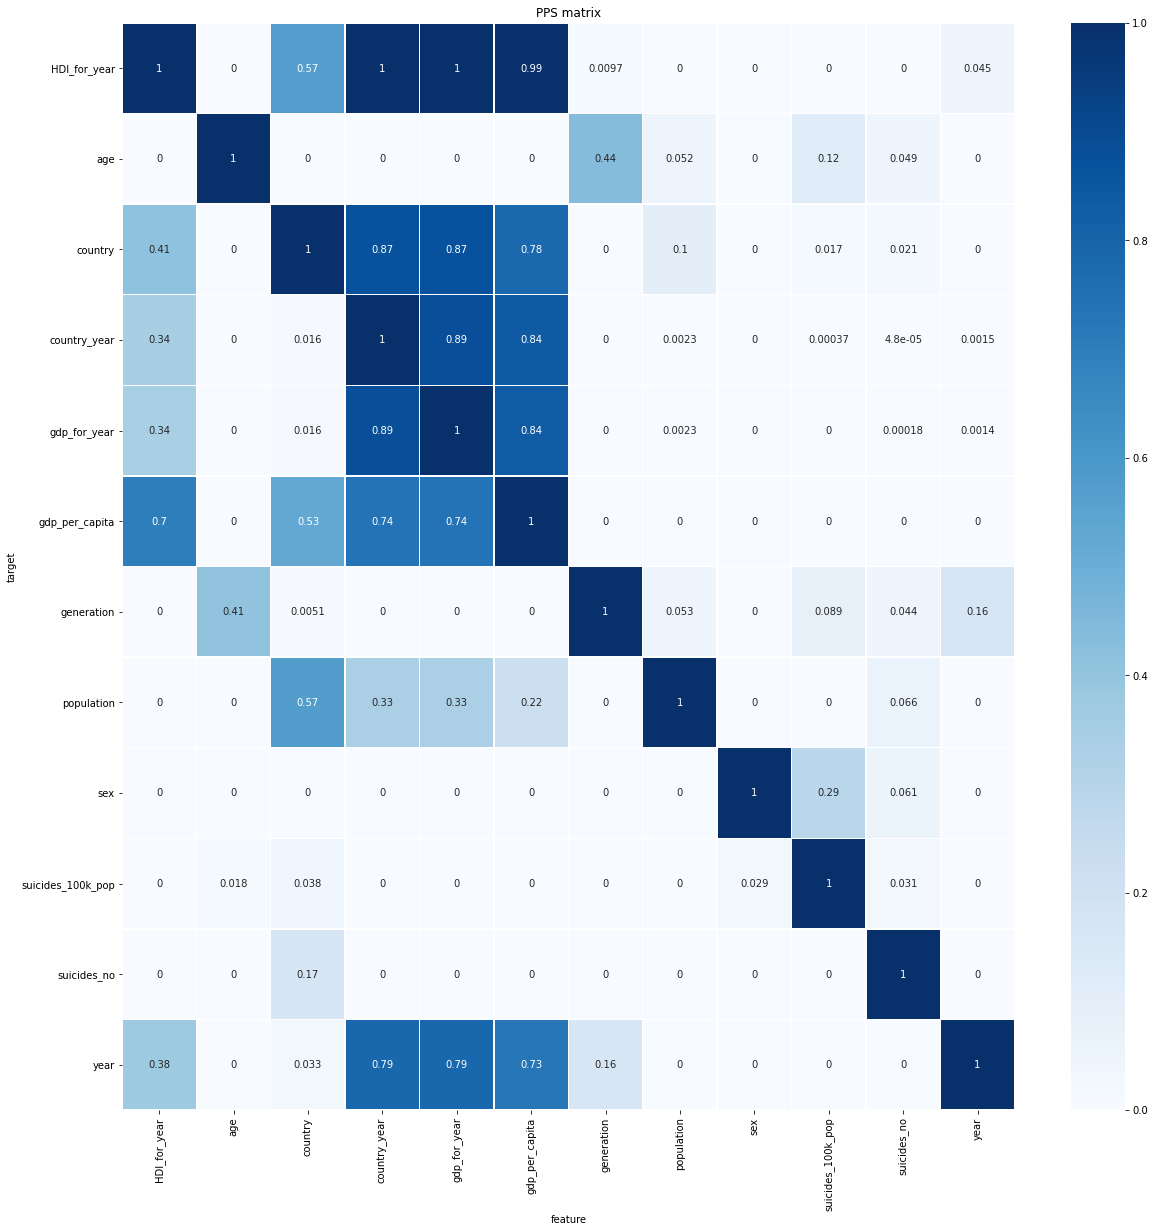

In [ ]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    fig, ax = plt.subplots(figsize=(20,20)) 
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

import ppscore as pps
matrix = pps.matrix(df)
heatmap(matrix)

Surprisingly, there is very weak correlation between age and suicides_100k_pop and even no correlation between age and suicides_no. And there is some correlation between country and suicides_no. Our hypothesis is that in different countries age distribution is very different as well as the reasons for people to do that are very different and don't have strong correlation with GDP per capita or HDI. We will check them next.

In [ ]:
sorted_countries = suicides.country.tolist() #the list of countries in order according to the mean of suicides numbers per country

**Suicides per country per year and GDP per capita**

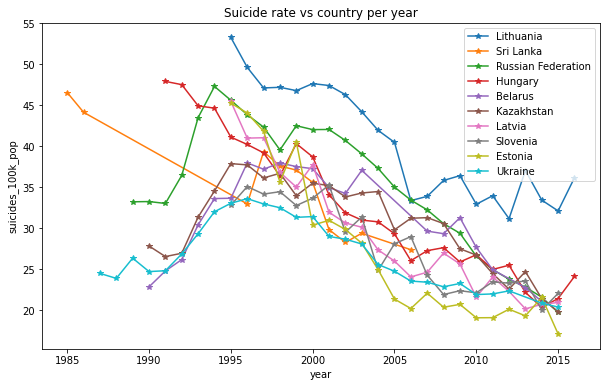

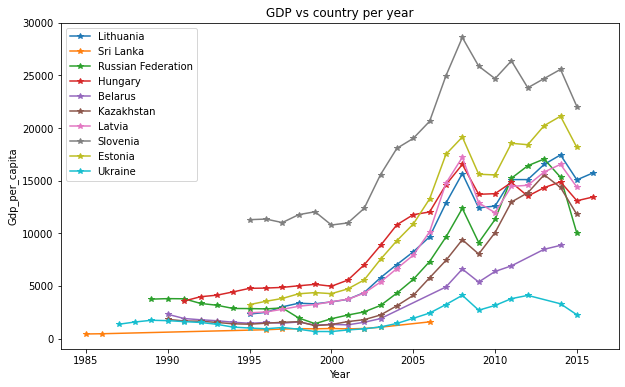

In [ ]:
plt.figure(figsize = (10,6))
df_sui = df.groupby(["country","year"]).suicides_100k_pop.mean()
for country in sorted_countries[:10]:
    plt.plot(df_sui[country].index,df_sui[country].values, label=country, marker="*")
plt.xlabel("year")
plt.ylabel("suicides_100k_pop")
plt.title("Suicide rate vs country per year")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in sorted_countries[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("Gdp_per_capita")
plt.title("GDP vs country per year")
plt.legend()
plt.show()

Well, Lithuania is an example of pretty high correlation between GDP and suicide rate.Sri Lanka demonstrates decreasing of suicide rate and almost no change in GDP per capita. Russian Federation, Hungary, Belarus, Latvia, Kazakhstan, Slovenia and Estonia have high correlation between GDP and suicide rate - with the GDP growing suicide rate is going down. That could be the case or could be not.What about Ukraine? There was a decreasng of suicide rate much earlier than country started to increase its GDP per capita and we can't say this growth looks impressive or correlating with suicide numbers. It's interesting that Slovenia whose GDP is the highest on this graph has higher suicide rate than Ukraine whose GDP is the lowest one among post SU countries.

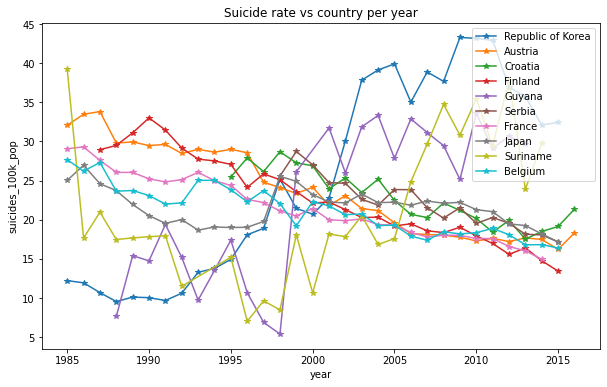

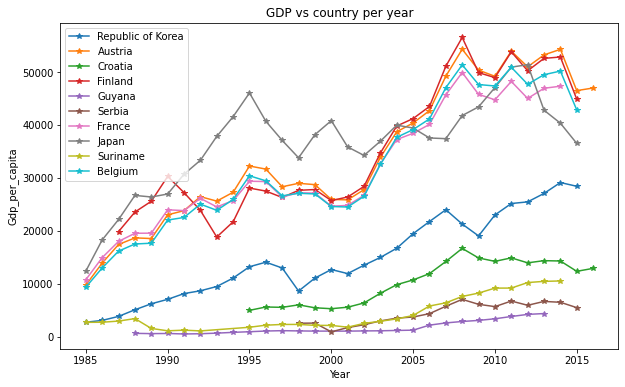

In [ ]:
plt.figure(figsize = (10,6))
df_sui = df.groupby(["country","year"]).suicides_100k_pop.mean()
for country in sorted_countries[10:20]:
    plt.plot(df_sui[country].index,df_sui[country].values, label=country, marker="*")
plt.xlabel("year")
plt.ylabel("suicides_100k_pop")
plt.title("Suicide rate vs country per year")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in sorted_countries[10:20]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("Gdp_per_capita")
plt.title("GDP vs country per year")
plt.legend()
plt.show()

Here we can see that European countries like Austria, Croatia, Finland, France and Belgium are demonstrating huge growth of GDP, while not so fast decreasing in suicide rates. Having such rich countries in top 20 speaks not in favour of GDP/suicide rate correlation.

There are some more interesting things here like Republic of Korea, Suriname, Guyana and Japan. In Korea, for example there is a clear evidence of GDP growth while at the same time suicide rate is growing dramatically! In Japan these curves on graphs look pretty independent.

In Suriname and Guyana there is a little increasing of GDP starting in 2000 and 2005 respectively, but their suicide rates look simply crazy. Probably, something is happening in those countries. Serbia shows higher decreasing in suicide rate than in GDP growth which is pretty amazing - is that European values influence?

If that analysis wasn't convincing enough, let's look at the bottom 10 countries - those whose suicide rate is the lowest and see if there is a correlation between GDP and suicide.

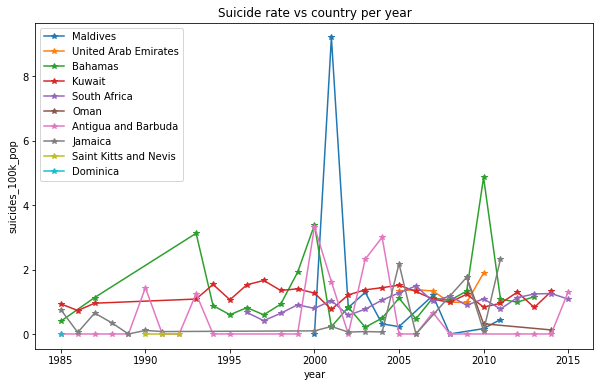

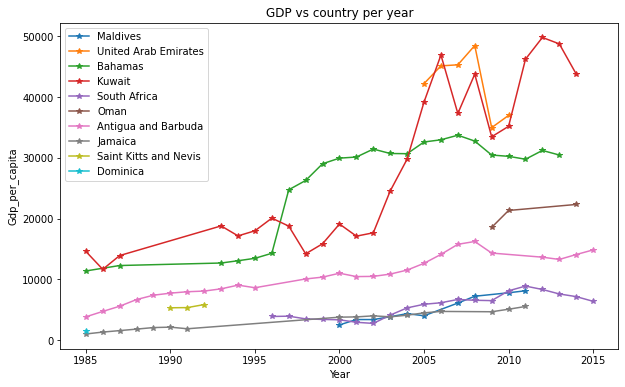

In [ ]:
plt.figure(figsize = (10,6))
df_sui = df.groupby(["country","year"]).suicides_100k_pop.mean()
for country in sorted_countries[-10:]:
    plt.plot(df_sui[country].index,df_sui[country].values, label=country, marker="*")
plt.xlabel("year")
plt.ylabel("suicides_100k_pop")
plt.title("Suicide rate vs country per year")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in sorted_countries[-10:]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("Gdp_per_capita")
plt.title("GDP vs country per year")
plt.legend()
plt.show()

On the one hand, Kuwait demostrates permament growth of GDP from 15000 to max around 50000 while the suicide level is stable (very low). On the other hand very poor Jamaica or South Africa whose GDP is around 5000 and suicide level very low as well. One can look more carefully at the GDP ranges and suicide levels bearing in mind that such different countries are on the bottom of suicide ratio table.

**HDI And Suicide Rates**

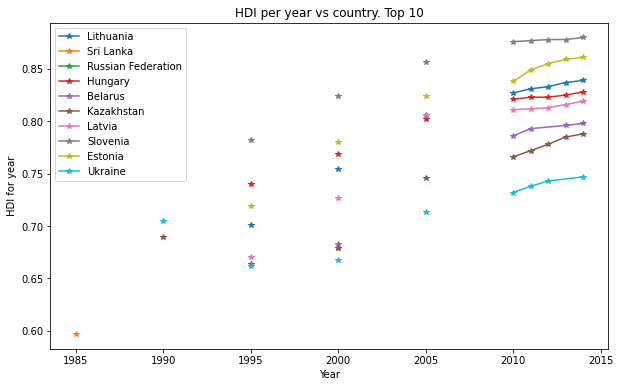

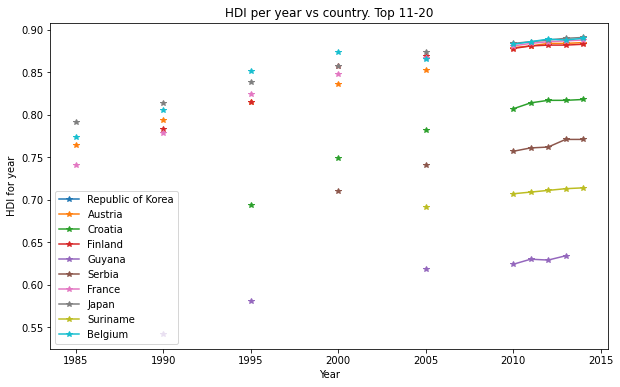

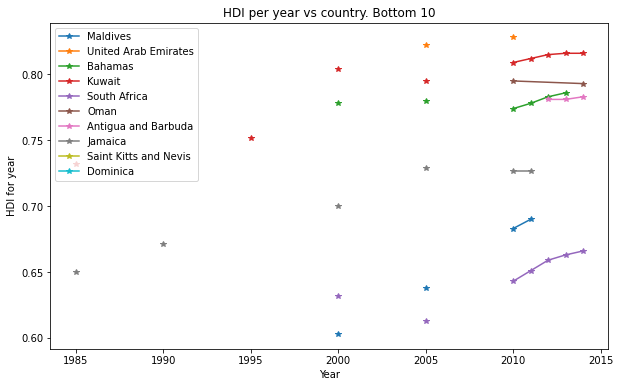

In [ ]:
plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).HDI_for_year.mean()
for country in sorted_countries[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("HDI for year")
plt.title("HDI per year vs country. Top 10")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).HDI_for_year.mean()
for country in sorted_countries[10:20]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("HDI for year")
plt.title("HDI per year vs country. Top 11-20")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).HDI_for_year.mean()
for country in sorted_countries[-10:]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("HDI for year")
plt.title("HDI per year vs country. Bottom 10")
plt.legend()
plt.show()

Obviously, there is not enough data to be confident since 70% of data is missing, but we can see some patterns that can correlate with GDP. Predictive Power Score showed that GDP is a good predictor for HDI, and both of them are not predictors for suicides_no.


In [ ]:
df1 = pd.DataFrame({"country_list": country_list, "country_suicide_ratio": country_suicide_ratio})
new_index = (df1["country_suicide_ratio"].sort_values(ascending=False)).index.values
sorted_data = df1.reindex(new_index)
sorted_data2 = sorted_data.drop(sorted_data.tail(42).index)
country_list_new = list(sorted_data2["country_list"])

kids = []
young = []
adult = []
pensioner = []
old = []
for i in country_list_new:
    x = df[df["country"] == i]
    ki = x[x['age']== '05-14 years']
    yo = x[x['age']=='15-24 years']
    ad = x[x['age']=='35-54 years']
    pe = x[x['age']=='55-74 years']
    ol = x[x['age']== '75+ years']
    z = sum(x.suicides_no)
    kids.append((sum (ki.suicides_no))*100/ z)
    young.append((sum (yo.suicides_no))*100/ z)
    adult.append((sum (ad.suicides_no))*100/ z)
    pensioner.append((sum (pe.suicides_no))*100/ z)
    old.append((sum (ol.suicides_no))*100/ z)

[Text(0, 0.5, '50 Countries with the Highest Suicide Rates'),
 Text(0.5, 0, 'Percentage of Age'),
 Text(0.5, 1.0, "Percentage of Countries's Suicides According to Age: Kids and Young people")]

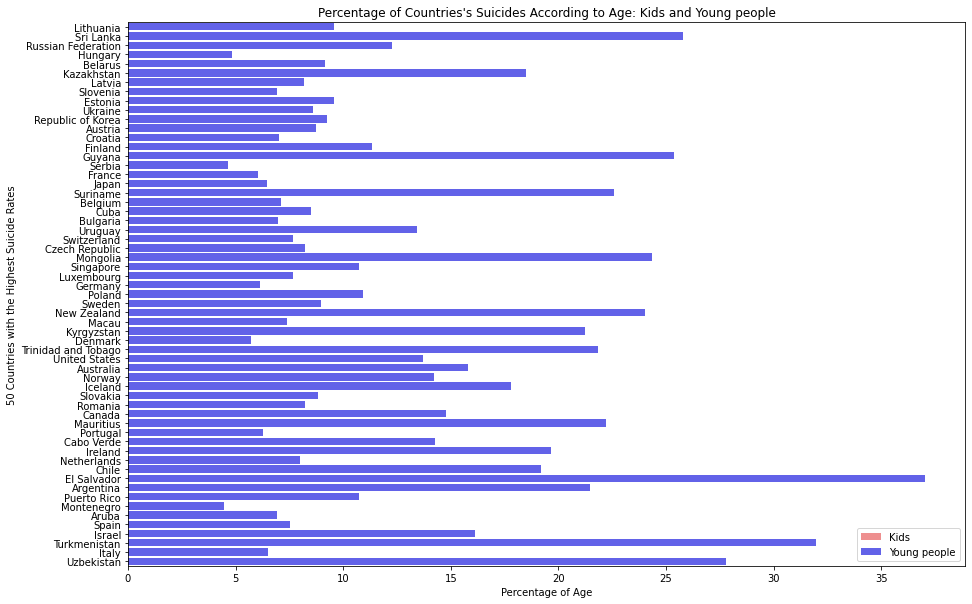

In [ ]:
f,ax = plt.subplots(figsize = (15,10))
sns.barplot(x=kids,y=country_list_new,color='red',alpha = 0.5,label='Kids' )
sns.barplot(x=young,y=country_list_new,color='blue',alpha = 0.7,label='Young people')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Age', ylabel='50 Countries with the Highest Suicide Rates',
       title = "Percentage of Countries's Suicides According to Age: Kids and Young people")

[Text(0, 0.5, '50 Countries with the Highest Suicide Rates'),
 Text(0.5, 0, 'Percentage of Age'),
 Text(0.5, 1.0, "Percentage of Countries's Suicides According to Age: Adults and Pensioners")]

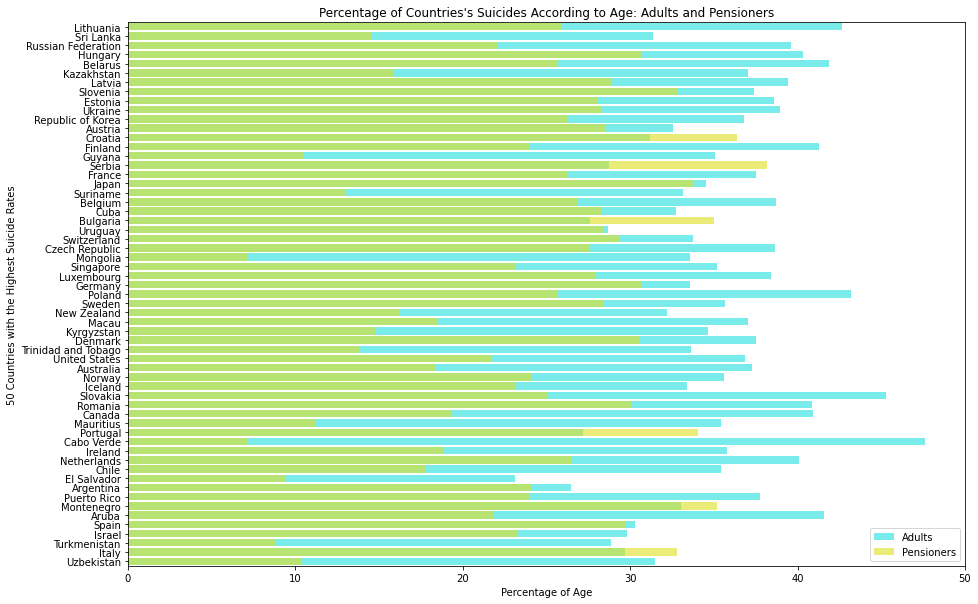

In [ ]:
f,ax = plt.subplots(figsize = (15,10))
sns.barplot(x=adult,y=country_list_new,color='cyan',alpha = 0.6,label='Adults')
sns.barplot(x=pensioner,y=country_list_new,color='yellow',alpha = 0.6,label='Pensioners')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Age', ylabel='50 Countries with the Highest Suicide Rates',
       title = "Percentage of Countries's Suicides According to Age: Adults and Pensioners")

[Text(0, 0.5, '50 Countries with the Highest Suicide Rates'),
 Text(0.5, 0, 'Percentage of Age'),
 Text(0.5, 1.0, "Percentage of Countries's Suicides According to Age:Pensioners and Old people")]

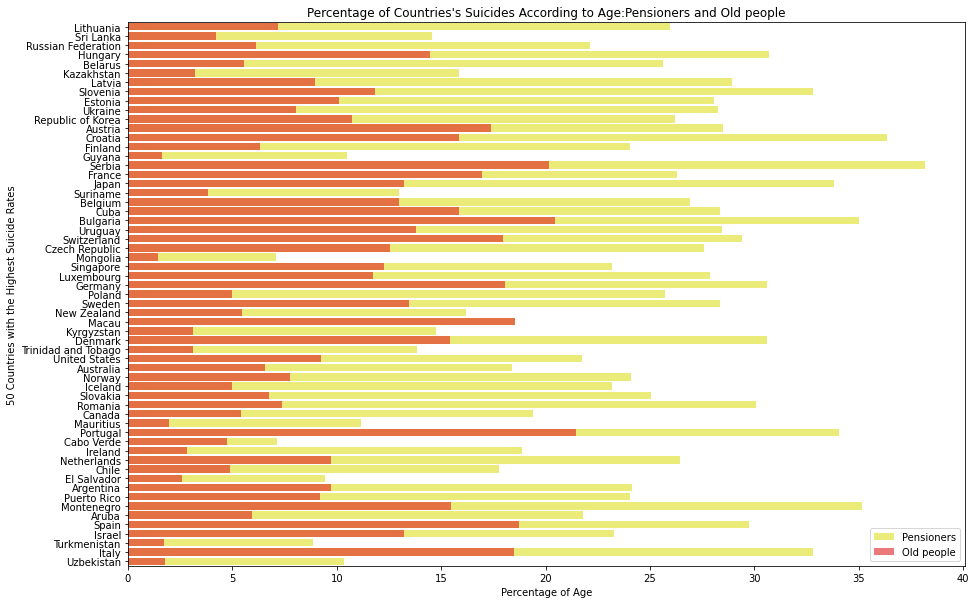

In [ ]:
f,ax = plt.subplots(figsize = (15,10))
sns.barplot(x=pensioner,y=country_list_new,color='yellow',alpha = 0.6,label='Pensioners')
sns.barplot(x=old,y=country_list_new,color='red',alpha = 0.6,label='Old people')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Age', ylabel='50 Countries with the Highest Suicide Rates',
       title = "Percentage of Countries's Suicides According to Age:Pensioners and Old people")

In [ ]:
def country_year_age(country):
    plt.figure(figsize = (8,6))
    sns.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (df[df["country"] == country]) )
    plt.xticks(rotation = 90)
    plt.title("Suicide rate of "+ str(country))
    plt.legend()    
    plt.show()

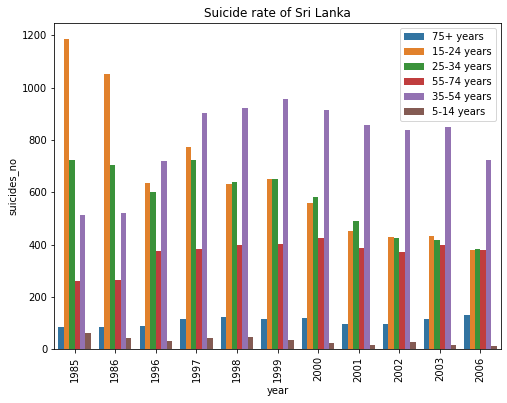

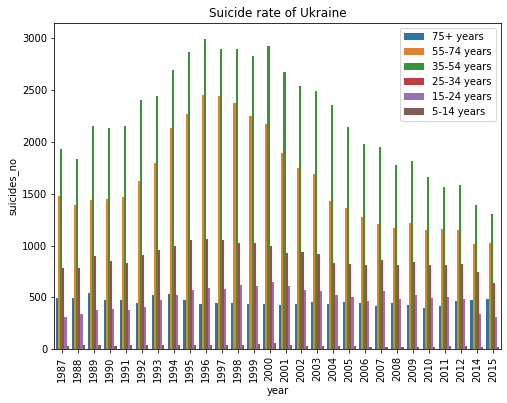

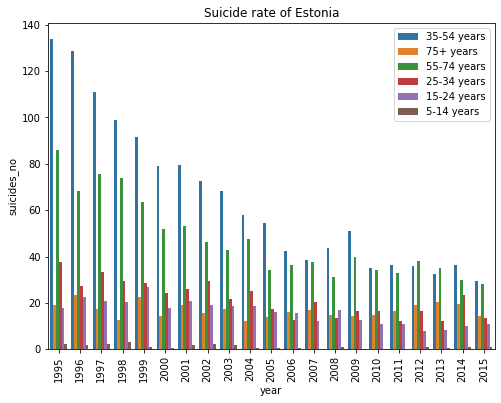

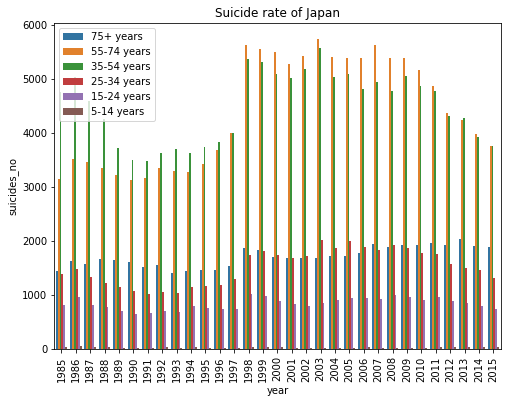

In [ ]:
country_year_age('Sri Lanka')
country_year_age('Ukraine')
country_year_age('Estonia')
country_year_age('Japan')


The most obvious thing is the suicide rate depends on countries and much less - on the age. Different countries show different age dictributions of suiciders, we saw that on the graphs of top 50 ountries. There is no correlation between GDP and suicide rate. It would be more reasonable to talk about shared values of some regions like Europe, where countries show similar tendencies.

The dramatic growth of suicide numbers was in the end of 1980 - 1995 and most of the countries that took first places are former Soviet Union countries, so we can cnclude that the system collapse reflected on local societies and led to increasing of suicides. However, they demonstrate a trend of decreasing those numbers after year 1995.

Asian countries like Japan and Korea are showing dangerous trend - increasing suicide numbers in the last years.

African countries are very unstable, it's hard to predict how will suicide rate change in the next few years.

That is why the first graph of total suicide numbers demonstrates relative stability within 2000-2014 and another peak in 2015. New different challenges (like Internet and social networks) people face in some countries (and which lead to a suicide) compensate the decreasing of suicide level in other countries that have already dealt with their own challenges.